<span style="font-size:110%; text-align:left;"><b><a href="../index.html">2.Plane Waves</a> > <a href="./index.html">1.Fabry Perot Cavity</a></b></span>
<br/><br/>
<span style="font-size:200%; text-align:left;"><b>1.Resonance</b></span>
<br/><br/>
<span style="font-size:110%; text-align:left;">Author: Daniel Töyrä </span>

<img src="FP_resonance.svg" style="width: 900px;"/>

# Table of Contents
 <p><div class="lev1"><a href="#1.-Introduction">1. Introduction</a></div><div class="lev1"><a href="#2.-Optical-Cavities-(Fabry-Perot-Interferometers)">2. Optical Cavities (Fabry-Perot Interferometers)</a></div><div class="lev2"><a href="#2.1.-The-Optical-Layout">2.1. The Optical Layout</a></div><div class="lev2"><a href="#2.2.-Lengths-and-Tunings">2.2. Lengths and Tunings</a></div><div class="lev2"><a href="#2.3.-The-FINESSE-model">2.3. The FINESSE model</a></div><div class="lev2"><a href="#2.4.-Simulation-example:-Cavity-Resonance">2.4. Simulation example: Cavity Resonance</a></div><div class="lev1"><a href="#3.-Tasks">3. Tasks</a></div><div class="lev2"><a href="#3.1.-Cavity-Power-over-Change-in-Macroscopic-Length-L">3.1. Cavity Power over Change in Macroscopic Length L</a></div><div class="lev2"><a href="#3.2.-Laser-Frequency">3.2. Laser Frequency</a></div><div class="lev2"><a href="#3.3.-Laser-frequency-and-macroscopic-cavity-length">3.3. Laser frequency and macroscopic cavity length</a></div><div class="lev1"><a href="#4.-Tasks-with-answers">4. Tasks with answers</a></div><div class="lev2"><a href="#4.1.-Cavity-Power-over-Change-in-Macroscopic-Length-L">4.1. Cavity Power over Change in Macroscopic Length L</a></div><div class="lev2"><a href="#4.2.-Laser-Frequency">4.2. Laser Frequency</a></div><div class="lev2"><a href="#4.3.-Laser-frequency-and-macroscopic-cavity-length">4.3. Laser frequency and macroscopic cavity length</a></div><div class="lev1"><a href="#5.-Summary">5. Summary</a></div>

# 1. Introduction

Optical cavities are based on the the original idea for a spectroscopy standard published by Fabry and Perot in 1899. Cavities are fundamental building blocks of current gravitational wave detectors and important instruments in laser optics in general. In this session we model a Fabry-Perot cavity, which consists of two parallel mirrors, and we look at how its optical properties depends on the macroscopic and microscopical cavity lengths.

** Recommended notebooks before you start:**

We recommend that you have looked through introductory notebooks that you find in the folder [01_Introduction](../../01_Introduction/index.html) before you start this one, or that you have basic experience of IPython/Jupyter Notebooks, PyKat, and Finesse. The link above only works if you started IPython/Jupyter Notebook in the top directory of this course.

**Reading material and references:**

[1] [A. Freise, K. Strain, D. Brown, and C. Bond, "Interferometer Techniques for Gravitational-Wave Detection", *Living Reviews in Relativity* **13**, 1 (2010)](http://arxiv.org/pdf/0909.3661v3). - Living review article (more like a book) on laser interferometry in the frequency domain for detecting gravitational waves, and FINESSE.

[2] [A. Freise, D. Brown, and C. Bond, "Finesse, Frequency domain INterferomEter Simulation SoftwarE"](http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf). - FINESSE-manual

[3] [FINESSE syntax reference](http://www.gwoptics.org/finesse/reference/) - Useful online syntax reference for FINESSE. Also available in the Finesse manual [2], but this online version is updated more often.

** After this session you will be able to... **

* create your own FINESSE model of a cavity.
* calibrate your cavity model to be on resonance

# 2. Optical Cavities (Fabry-Perot Interferometers)

We start by loading PyKat and other Python packages that we need:

In [1]:
import numpy as np                         # Importing numpy
import matplotlib                          # For plotting
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib inline      
# Initialises the PyKat plotting tool. Change dpi value 
# to change figure sizes on your screen.
pykat.init_pykat_plotting(dpi=90)          

                                              ..-
    PyKat 1.0.19          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



## 2.1. The Optical Layout

The setup we want to model can be seen in the figure below. We have an input laser and two mirrors that make up an optical cavity (Fabry-Perot cavity). To measure the reflected, circulating, and transmitted power we add photo diodes. 

<img src="fabry-perot.svg" style="width: 500px;"/>

## 2.2. Lengths and Tunings

The resonance condition of the cavity depends on the optical path lengths modulo the laser wavelength, i.e. for the light of a Nd:YAG laser ($\lambda = 1064$ nm), length differences of less than 1 μm are of interest. Some orders of magnitude:

  * LIGO peak senitivity in meters: $\sim 10^{-20}$ m
  * LIGO cavity mirror postion control accuracy: $< 10^{-12}$ m
  * LIGO arm cavity length: $\sim 10^3$ m
  * relative numerical accuracy of floating point numbers: $10^{-15}$


Therefore, it is convenient to split distances D between optical components into two parameters: one is the macroscopic ‘length’ L defined now as that multiple of the default wavelength $\lambda_0$ yielding the smallest difference to D. The second parameter is the microscopic tuning that is defined as the remaining difference between L and D. This tuning is usually given as a phase "phi" (in radians) with $2\pi$ referring to one wavelength. In FINESSE tunings are entered and printed in degrees, so that a tuning of phi = 360 degrees refers to a change in the position of the component by one wavelength ($\lambda_0$). In FINESSE macroscopic lengths are assigned to space components (keyword `s`) and microscopical tunings are assigned to optical components such as mirrors, beam splitters, lenses etc. You can read more about how lengths and tuning are defined in FINESSE in section 2.5 of the living review article [1]. 

## 2.3. The FINESSE model

Lets build an optical model in FINESSE matching the setup in the figure above.

In [4]:
basekat=finesse.kat() # initialising Finesse
basekat.verbose = False
basecode = """
l laser 1 0 n0   # Laser (Power = 1 W, wavelength offset = 0)
s s1 1 n0 nc1    # Space (Length = 1 m)

## The cavity ##
m m1 0.7 0.3 0 nc1 nc2  # Mirror  (R = 0.7, T = 0.3, phi = 0)
s sL 4000 nc2 nc3       # Space (Length = 4 km)
m m2 0.8 0.2 0 nc3 nc4  # Mirror  (R = 0.8, T = 0.2, phi = 0)
"""
basekat.parseKatCode(basecode) # Parsing the FINESSE-code

/Users/toyradaw/work/miniconda3/envs/myenv/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: parseKatCode depreciated, use parse.


We call this kat-object *basekat* since it describes the core optics of the system we will investigate throughout this notebook.

## 2.4. Simulation example: Cavity Resonance

To start with we look at the light power reflected by, transmitted through, and circulating inside the cavity. On the x-axis we will change the microscopic mirror position (tuning or phi), which should be the key parameter to see a change in the response of the cavity. Lets see if this is true by adding photo diodes that measures what we want while varying the tuning of the mirror `m1`.

In [5]:
kat1 = deepcopy(basekat)
code = """
## Detectors ##

# Photo diodes measureing DC-power
pd refl nc1          # Reflected field
pd circ nc2          # Circulating field
pd tran nc4          # Transmitted field

## Simulation instructions ##
xaxis m1 phi lin -450 90 2000   # Varying tuning of input mirror m1.
yaxis abs                       # Plotting the amplitude of the detector measurements. 
"""
kat1.parseKatCode(code) # Parsing the FINESSE-code
out1 = kat1.run()       # Running the FINESSE-simulation, storing output in out1.

/Users/toyradaw/work/miniconda3/envs/myenv/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: parseKatCode depreciated, use parse.


Plotting results:

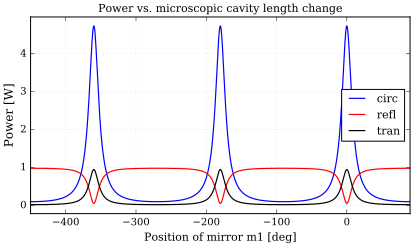

In [6]:
fig2 = out1.plot(xlabel='Position of mirror m1 [deg]',
                 ylabel='Power [W]', 
                 title = 'Power vs. microscopic cavity length change')

Clearly the response of the cavity depends heavily on the tuning, as expected. At resonance (e.g. at m1 position = 0), the reflected power is minimal and the transmitted and circulating power are maximal. At anti-resonance (e.g. m1 position = -90) almost all power is reflected. The resonances occur every 180 deg which is equivalent to position changes of $\lambda_0/2$, or changes in round-trip length by $\lambda_0$, as expected.

# 3. Tasks

We want to explore the behaviour of the cavity resonance when some different parameter changes. 

## 3.1. Cavity Power over Change in Macroscopic Length L

Plot the cavity power (transmitted, reflected and circulating) versus the macroscopic length L of the cavity, that is, the length of the space component. What do you see? 

**Answer:**

## 3.2. Laser Frequency

The cavity resonance occurs when the cavity roundtrip length is an integer multiple of the laser wavelength. Thus we should be able to detune the cavity either by moving a mirror, as we did above, or by changing the laser frequency. Recreate the plot above, but this time tuning the laser frequency instead of the position of a mirror.

**Answer:**

## 3.3. Laser frequency and macroscopic cavity length

Set the laser frequency offset to 20 kHz, and repeat task 3.1. Why is the result different from task 3.1? *Hint: See 3.3.2 in the FINESSE manual.*

**Answer:**

# 4. Tasks with answers

We want to explore the behaviour of the cavity resonance when some different parameter changes. 

## 4.1. Cavity Power over Change in Macroscopic Length L

Plot the cavity power (transmitted, reflected and circulating) versus the macroscopic length L of the cavity, that is, the length of the space component. What do you see? 

**Answer:**

In [7]:
kat2 = deepcopy(basekat)
code = """
## Detectors ##

# Photo diodes measuring DC-power
pd refl nc1      # Reflected field
pd tran nc4      # Transmitted field
pd circ nc2      # Circulating field

## Simulaion instructions ##
xaxis sL L lin 10 10000 400   # Chaning length of the cavity space.
yaxis abs                     # Outputs absolute values of detectors
"""
kat2.parseKatCode(code) # Parsing the FINESSE-code
out2 = kat2.run()       # Running the FINESSE-simulation, storing output in out2.

/Users/toyradaw/work/miniconda3/envs/myenv/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: parseKatCode depreciated, use parse.


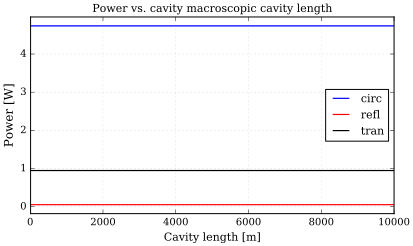

In [8]:
fig = out2.plot(ylabel = 'Power [W]', 
                xlabel = 'Cavity length [m]',
                title = 'Power vs. cavity macroscopic cavity length')

The reflected, circulaiting and transmitted powers are unchanged when the macroscopical cavity length is changed. Since we have used phi=0 for both mirrors we are always on resonance.

## 4.2. Laser Frequency

The cavity resonance occurs when the cavity roundtrip length is an integer multiple of the laser wavelength. Thus we should be able to detune the cavity either by moving a mirror, as we did above, or by changing the laser frequency. Recreate the plot above, but this time tuning the laser frequency instead of the position of a mirror.

**Answer:**

In [9]:
kat3 = basekat.deepcopy()   # Copying basekat

# FINESSE-code
code = """
## Detectors ##

# Photo diodes measuring DC-power
pd refl nc1           # Reflected field
pd circ nc2           # Circulating field
pd tran nc4           # Transmitted field

## Simulation instructions ##
xaxis laser f lin -100k 20k 400  # Sweeping lasaer frequency offset, -100 kHz to 20 kHz
yaxis abs                        # Outputs absolute values of detectors
"""

kat3.parseKatCode(code) # Parsing the FINESSE-Code
out3 = kat3.run()       # Running the simulation

/Users/toyradaw/work/miniconda3/envs/myenv/lib/python3.5/site-packages/ipykernel/__main__.py:17: UserWarning: parseKatCode depreciated, use parse.


Plotting results:

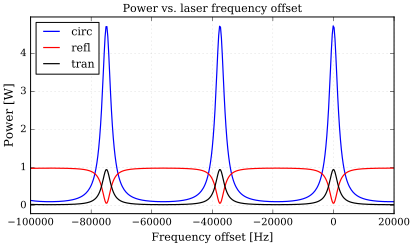

In [10]:
fig3 = out3.plot(ylabel = 'Power [W]',
                 xlabel = 'Frequency offset [Hz]',
                 title = 'Power vs. laser frequency offset')

## 4.3. Laser frequency and macroscopic cavity length

Set the laser frequency offset to 20 kHz, and repeat task 4.1. Why is the result different from task 4.1? *Hint: See 3.3.2 in the FINESSE manual.*

**Answer:**

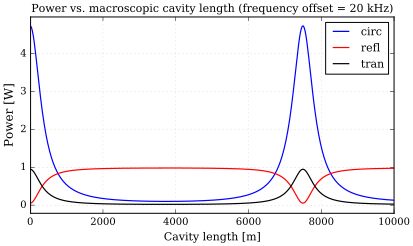

In [11]:
kat4 = kat2.deepcopy()   # Copying kat2
kat4.laser.f = 2.0e4     # Setting frequency offset to 20 kHz
out4 = kat4.run()        # Running simulation

# Plotting results
fig4 = out4.plot(ylabel='Power [W]', 
                 xlabel='Cavity length [m]', 
                 title='Power vs. macroscopic cavity length ' 
                       '(frequency offset = 20 kHz)')       

In FINESSE the length of a space component is defined as an integer multiple of the wavelength set in the file *kat.ini*, which by default is $\lambda_0 = 1064$ nm. Hence, by changing the frequncy offset $\Delta f$ of the laser, the macroscopical cavity length $L$ is no longer an integer multiple of the laser wavelength $\lambda$ and the total roundtrip phase is now given by

\begin{align}
\varphi_{rt} = -2\left(\frac{2\pi \Delta f L}{c} + \phi \right).
\end{align}

Here, $\phi$ is the tuning in radians and $c$ is the speed of light. Since the resonance condition for a single frequency component in a cavity is $\varphi_{rt} = 2n\pi$, where $n$ is an integer, the resonance clearly depends on the macroscopic cavity length when the laser is offset in frequency.

# 5. Summary

In this session we have:
* built a FINESSE model of a Fabry-Perot cavity
* investigated how the power depends on the mirror tuning (microscopical length)
* investigated how the power depends on the macroscopical cavity length
* investigated how the power depends on the macroscopical cavity length with an offset laser frequency. 

In the [next session](02_Impedance_matched.html) we will go through what is meant by impedance matched, over coupled, and under coupled cavities.